In [1]:
!pip install patchify

In [2]:
!pip install wandb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.5/188.5 kB 21.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.7/214.7 kB 24.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.7 MB/s eta 0:00:00
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8791 sha256=4ffae7440c40a7f9856295e7b20666efbf656904094f84dc8d07910b7586a520
  Stored in directory: /root/.cache/pip/wheels/e7/f3/22/152153d6eb222ee7a56ff8617d80ee5207207a8c00a7aab794
Successfully built pathtools


In [3]:
!wandb login

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [4]:
!pip install -U segmentation-models

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 3.7 MB/s eta 0:00:00


In [5]:
!pip install -U tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.1/524.1 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 72.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 87.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 35.1 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.7.1
    Uninstalling typing_extensions-4.7.1:
      Successfully uninstalled typing_extensions-4.7.1
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.12.0
    Uninstalling tensorflow-estimator-2.12.0:
      Successfully uninstalled tensorflow-estimator-2.12.0
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.12.3
    Uninstalling tensorboard-2.12.

In [6]:
import os
import cv2
from PIL import Image
import numpy as np
from patchify import patchify
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
import random


In [7]:
%matplotlib inline

In [8]:
minmaxscaler = MinMaxScaler()

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
!ls -lah '/content/drive/MyDrive/Colab Notebooks/data'

total 32K
drwx------ 2 root root 4.0K Jun  1 12:21 'Tile 1'
drwx------ 2 root root 4.0K Jun  1 12:21 'Tile 2'
drwx------ 2 root root 4.0K Jun  1 12:21 'Tile 3'
drwx------ 2 root root 4.0K Jun  1 12:21 'Tile 4'
drwx------ 2 root root 4.0K Jun  1 12:21 'Tile 5'
drwx------ 2 root root 4.0K Jun  1 12:21 'Tile 6'
drwx------ 2 root root 4.0K Jun  1 12:21 'Tile 7'
drwx------ 2 root root 4.0K Jun  1 12:21 'Tile 8'


In [11]:
dataset_root_folder = '/content/drive/MyDrive/Colab Notebooks/'
dataset_name = 'data'

In [45]:
for path, subsdirs, files in os.walk(os.path.join(dataset_root_folder, dataset_name)):
  dir_name = path.split("/")[-1]
  #print(dir_name)
  if dir_name == 'masks':
    images = os.listdir(path)
    print(path)
    for i, image_name in enumerate(images):
      #print(image_name)
      a = 1

/content/drive/MyDrive/Colab Notebooks/data/Tile 5/masks
/content/drive/MyDrive/Colab Notebooks/data/Tile 7/masks
/content/drive/MyDrive/Colab Notebooks/data/Tile 8/masks
/content/drive/MyDrive/Colab Notebooks/data/Tile 1/masks
/content/drive/MyDrive/Colab Notebooks/data/Tile 2/masks
/content/drive/MyDrive/Colab Notebooks/data/Tile 3/masks
/content/drive/MyDrive/Colab Notebooks/data/Tile 6/masks
/content/drive/MyDrive/Colab Notebooks/data/Tile 4/masks


In [46]:
image_patch_size = 256

In [47]:
image = cv2.imread(f'{dataset_root_folder}/{dataset_name}/Tile 1/images/image_part_001.jpg', 1)
image.shape

(644, 797, 3)

In [48]:
help(patchify)

Help on function patchify in module patchify:

patchify(image: numpy.ndarray, patch_size: Union[Tuple[int, int], Tuple[int, int, int]], step: int = 1) -> numpy.ndarray
    Split a 2D or 3D image into small patches given the patch size.
    
    Parameters
    ----------
    image: the image to be split. It can be 2d (m, n) or 3d (k, m, n)
    patch_size: the size of a single patch
    step: the step size between patches
    
    Examples
    --------
    >>> image = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])
    >>> patches = patchify(image, (2, 2), step=1)  # split image into 2*3 small 2*2 patches.
    >>> assert patches.shape == (2, 3, 2, 2)
    >>> reconstructed_image = unpatchify(patches, image.shape)
    >>> assert (reconstructed_image == image).all()



In [49]:
image_dataset = []
mask_dataset = []

for image_type in ['images', 'masks']:
  if image_type == 'images':
    image_extension = 'jpg'
  elif image_type == 'masks':
    image_extension = 'png'

  for tile_id in range(1,8):
    for image_id in range(1, 20):
      image = cv2.imread(f'{dataset_root_folder}/{dataset_name}/Tile {tile_id}/{image_type}/image_part_00{image_id}.{image_extension}', 1)
      if image is not None:
        if image_type == 'masks':
          image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        size_x = (image.shape[1]//image_patch_size) * image_patch_size
        size_y = (image.shape[0]//image_patch_size) * image_patch_size
        #print("{}-----{}--{}".format(image.shape, size_x, size_y))

        #Transformer le l'image (matrice) de type np.array en objet image
        image = Image.fromarray(image)

        #recadrer l'image
        image = image.crop((0, 0, size_x, size_y))

        #retransformer l'objet image en array
        image = np.array(image)

        patched_images = patchify(image, (image_patch_size, image_patch_size, 3), step=image_patch_size)
        for i in range(patched_images.shape[0]):
          for j in range(patched_images.shape[1]):

            #Recuperer chaque image contenu dans chaque patch de l'image globale
            individual_patched_image = patched_images[i, j]
            #print(individual_patched_image.shape)

            if image_type == 'images':
              #Normalisation de l'image (normaliser les valeurs entre 0 et 1)
              individual_patched_image = minmaxscaler.fit_transform(individual_patched_image.reshape(-1, individual_patched_image.shape[-1])).reshape(individual_patched_image.shape)

              #Recuperer la matrice exacte de l'image
              individual_patched_image = individual_patched_image[0]
              #print(individual_patched_image.shape)
              image_dataset.append(individual_patched_image)

            elif image_type == 'masks':
              #Recuperer la matrice exacte du mask
              individual_patched_mask = individual_patched_image[0]
              mask_dataset.append(individual_patched_mask)

In [50]:
image_dataset = np.array(image_dataset)
mask_dataset = np.array(mask_dataset)

In [51]:
print(len(image_dataset))
print(len(mask_dataset))

945
945


In [52]:
image_dataset[0]

array([[[0.78823529, 0.76470588, 0.74509804],
        [0.88235294, 0.85882353, 0.83921569],
        [0.94509804, 0.90980392, 0.89411765],
        ...,
        [0.89411765, 0.85882353, 0.82352941],
        [0.85882353, 0.83137255, 0.79607843],
        [0.87843137, 0.85098039, 0.81568627]],

       [[0.88627451, 0.8627451 , 0.84313725],
        [0.99607843, 0.97254902, 0.95294118],
        [1.        , 1.        , 0.98431373],
        ...,
        [0.93333333, 0.89803922, 0.8627451 ],
        [0.92941176, 0.90196078, 0.86666667],
        [0.95294118, 0.91764706, 0.88235294]],

       [[0.97254902, 0.94509804, 0.93333333],
        [1.        , 0.98823529, 0.97647059],
        [1.        , 1.        , 0.98431373],
        ...,
        [0.93333333, 0.89411765, 0.86666667],
        [0.92156863, 0.89411765, 0.85882353],
        [0.90196078, 0.86666667, 0.83137255]],

       ...,

       [[0.88235294, 0.8627451 , 0.86666667],
        [0.81960784, 0.80392157, 0.8       ],
        [0.7372549 , 0

In [53]:
mask_dataset[1]

array([[[132,  41, 246],
        [155, 155, 155],
        [155, 155, 155],
        ...,
        [226, 169,  41],
        [226, 169,  41],
        [226, 169,  41]],

       [[132,  41, 246],
        [155, 155, 155],
        [155, 155, 155],
        ...,
        [226, 169,  41],
        [226, 169,  41],
        [226, 169,  41]],

       [[132,  41, 246],
        [132,  41, 246],
        [155, 155, 155],
        ...,
        [226, 169,  41],
        [226, 169,  41],
        [226, 169,  41]],

       ...,

       [[132,  41, 246],
        [132,  41, 246],
        [132,  41, 246],
        ...,
        [110, 193, 228],
        [110, 193, 228],
        [110, 193, 228]],

       [[132,  41, 246],
        [132,  41, 246],
        [132,  41, 246],
        ...,
        [110, 193, 228],
        [110, 193, 228],
        [110, 193, 228]],

       [[132,  41, 246],
        [132,  41, 246],
        [132,  41, 246],
        ...,
        [110, 193, 228],
        [110, 193, 228],
        [110, 193, 228]]

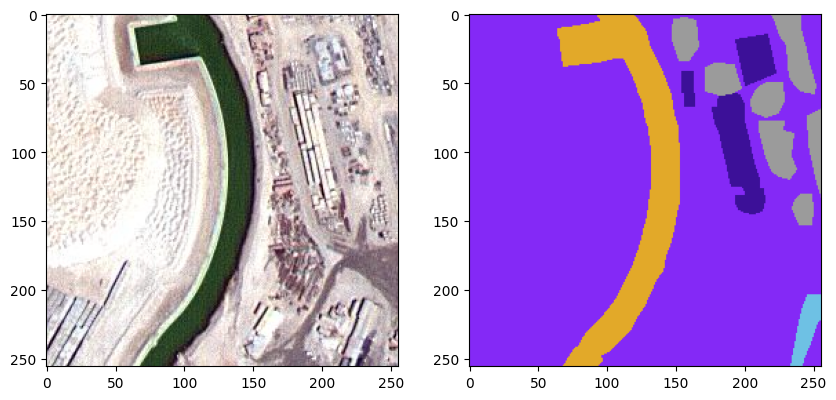

In [54]:
random_image_id = random.randint(0, len(image_dataset))

plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.imshow(image_dataset[0])

plt.subplot(1,2,2)
plt.imshow(mask_dataset[0])

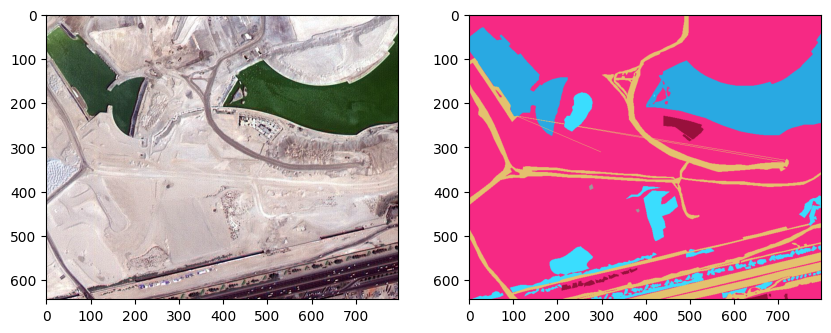

In [55]:
image = cv2.imread(f'{dataset_root_folder}/{dataset_name}/Tile 1/images/image_part_007.jpg', 1)
mask = cv2.imread(f'{dataset_root_folder}/{dataset_name}/Tile 1/masks/image_part_007.png', 1)
#mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.imshow(image)

plt.subplot(1,2,2)
plt.imshow(mask)

In [56]:
class_building = '#3C10984'
class_building = class_building.lstrip('#')
class_building = np.array(tuple(int(class_building[i:i+2], 16) for i in (0, 2, 4)))
print(class_building)

[ 60  16 152]


In [57]:
class_land = '#8429F6'
class_land = class_land.lstrip('#')
class_land = np.array(tuple(int(class_land[i:i+2], 16) for i in (0, 2, 4)))
print(class_land)

[132  41 246]


In [58]:
class_road = '#6EC1E4'
class_road = class_road.lstrip('#')
class_road = np.array(tuple(int(class_road[i:i+2], 16) for i in (0, 2, 4)))
print(class_road)

[110 193 228]


In [59]:
class_vegetation = '#FEDD3A'
class_vegetation = class_vegetation.lstrip('#')
class_vegetation = np.array(tuple(int(class_vegetation[i:i+2], 16) for i in (0, 2, 4)))
print(class_vegetation)

[254 221  58]


In [60]:
class_water = '#E2A929'
class_water = class_water.lstrip('#')
class_water = np.array(tuple(int(class_water[i:i+2], 16) for i in (0, 2, 4)))
print(class_water)

[226 169  41]


In [61]:
class_unlabeled = '#9B9B9B'
class_unlabeled = class_unlabeled.lstrip('#')
class_unlabeled = np.array(tuple(int(class_unlabeled[i:i+2], 16) for i in (0, 2, 4)))
print(class_unlabeled)

[155 155 155]


In [62]:
label = individual_patched_mask

In [63]:
def rgb_to_label(label):
  label_segment = np.zeros(label.shape)
  label_segment[np.all(label == class_water, axis=-1)] = 0
  label_segment[np.all(label == class_land, axis=-1)] = 1
  label_segment[np.all(label == class_road, axis=-1)] = 2
  label_segment[np.all(label == class_building, axis=-1)] = 3
  label_segment[np.all(label == class_vegetation, axis=-1)] = 4
  label_segment[np.all(label == class_unlabeled, axis=-1)] = 5
  # print(label_segment)
  label_segment = label_segment[:,:,0]
 # print(label_segment)
  return label_segment

In [64]:
labels = []
for i in range(mask_dataset.shape[0]):
  label = rgb_to_label(mask_dataset[i])
  labels.append(label)


In [65]:
labels = np.array(labels)
labels.shape

(945, 256, 256)

In [66]:
labels = np.expand_dims(labels, axis=3)

In [67]:
labels.shape

(945, 256, 256, 1)

In [68]:
np.unique(labels[:,:, :, 0])

array([0., 1., 2., 3., 4., 5.])

In [69]:
print("total unique labels based on mask: ", format(np.unique(labels )))

total unique labels based on mask:  [0. 1. 2. 3. 4. 5.]


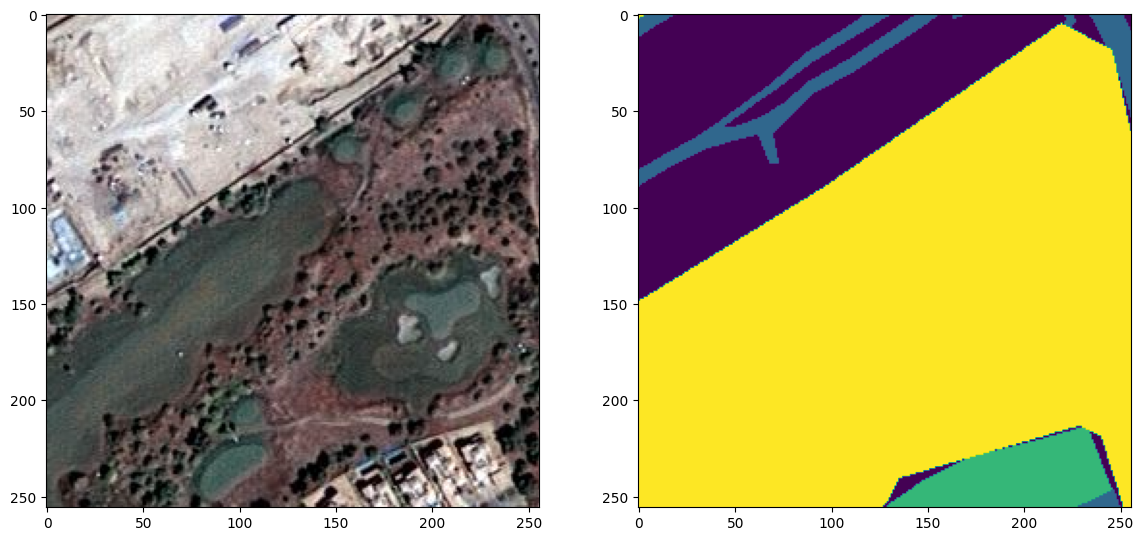

In [70]:
random_image_id = random.randint(0, len(image_dataset))

plt.figure(figsize=(14,8))
plt.subplot(121)
plt.imshow(image_dataset[random_image_id])
plt.subplot(122)
plt.imshow(labels[random_image_id][:, :, 0])

In [71]:
master_training_dataset = image_dataset

In [72]:
total_classes = len(np.unique(labels))

In [73]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection  import  train_test_split

In [74]:
total_classes

6

In [75]:
labels_categorical_dataset = to_categorical(labels, num_classes=total_classes)

In [76]:
master_training_dataset = image_dataset

In [77]:
x_train, x_test, y_train, y_test = train_test_split(master_training_dataset, labels_categorical_dataset, test_size=0.15, random_state=100)

In [78]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(803, 256, 256, 3) (142, 256, 256, 3) (803, 256, 256, 6) (142, 256, 256, 6)


In [79]:
image_height = x_train.shape[1]
image_width = x_train.shape[2]
image_channels = x_train.shape[3]
total_classes = y_train.shape[3]

In [80]:
print(image_height, image_width, image_channels, total_classes)

256 256 3 6


In [81]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose
from keras.layers import concatenate, BatchNormalization, Dropout, Lambda

In [82]:
from keras import backend as k

In [83]:
def jaccard_coef(y_true, y_pred):
  y_true_flatten = k.flatten(y_true)
  y_pred_flatten = k.flatten(y_pred)
  intersection = k.sum(y_true_flatten * y_pred_flatten)
  final_coef_value = (intersection + 1.0) / (k.sum(y_true_flatten) + k.sum(y_pred_flatten) - intersection + 1.0)
  return final_coef_value

In [84]:
def multi_unet_model(n_classes=5, image_height=256, image_width=256, image_channels=1):

  inputs = Input((image_height, image_width, image_channels))

  source_input = inputs

  c1 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(source_input)
  c1 = Dropout(0.2)(c1)
  c1 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c1)
  p1 = MaxPooling2D((2,2))(c1)

  c2 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p1)
  c2 = Dropout(0.2)(c2)
  c2 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c2)
  p2 = MaxPooling2D((2,2))(c2)

  c3 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p2)
  c3 = Dropout(0.2)(c3)
  c3 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c3)
  p3 = MaxPooling2D((2,2))(c3)

  c4 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p3)
  c4 = Dropout(0.2)(c4)
  c4 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c4)
  p4 = MaxPooling2D((2,2))(c4)

  c5 = Conv2D(256, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p4)
  c5 = Dropout(0.2)(c5)
  c5 = Conv2D(256, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c5)

  u6 = Conv2DTranspose(128, (2,2), strides=(2,2), padding="same")(c5)
  u6 = concatenate([u6, c4])
  c6 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u6)
  c6 = Dropout(0.2)(c6)
  c6 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c6)

  u7 = Conv2DTranspose(64, (2,2), strides=(2,2), padding="same")(c6)
  u7 = concatenate([u7, c3])
  c7 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u7)
  c7 = Dropout(0.2)(c7)
  c7 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c7)

  u8 = Conv2DTranspose(32, (2,2), strides=(2,2), padding="same")(c7)
  u8 = concatenate([u8, c2])
  c8 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u8)
  c8 = Dropout(0.2)(c8)
  c8 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c8)

  u9 = Conv2DTranspose(16, (2,2), strides=(2,2), padding="same")(c8)
  u9 = concatenate([u9, c1], axis=3)
  c9 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u9)
  c9 = Dropout(0.2)(c9)
  c9 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c9)

  outputs = Conv2D(n_classes, (1,1), activation="softmax")(c9)
  model = Model(inputs=[inputs], outputs=[outputs])
  return model

In [85]:
metrics = ["accuracy", jaccard_coef]

In [86]:
def get_deep_learning_model():
  return multi_unet_model(n_classes=total_classes,
                          image_height=image_height,
                          image_width=image_width,
                          image_channels=image_channels)

In [87]:
model = get_deep_learning_model( )

In [88]:
model.get_config()

{'name': 'model',
 'trainable': True,
 'layers': [{'module': 'keras.layers',
   'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 256, 256, 3),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'input_1'},
   'registered_name': None,
   'name': 'input_1',
   'inbound_nodes': []},
  {'module': 'keras.layers',
   'class_name': 'Conv2D',
   'config': {'name': 'conv2d',
    'trainable': True,
    'dtype': 'float32',
    'filters': 16,
    'kernel_size': (3, 3),
    'strides': (1, 1),
    'padding': 'same',
    'data_format': 'channels_last',
    'dilation_rate': (1, 1),
    'groups': 1,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'module': 'keras.initializers',
     'class_name': 'HeNormal',
     'config': {'seed': None},
     'registered_name': None},
    'bias_initializer': {'module': 'keras.initializers',
     'class_name': 'Zeros',
     'config': {},
     'registered_name': None},
    'kernel_regularizer': N

In [89]:
weights = [0.166, 0.166, 0.166, 0.166, 0.166, 0.166]

In [90]:
%env SM_FRAMEWORK=tf.keras
import segmentation_models as sm

env: SM_FRAMEWORK=tf.keras
Segmentation Models: using `tf.keras` framework.


In [91]:
dice_loss = sm.losses.DiceLoss(class_weights=weights)

In [92]:
focal_loss = sm.losses.CategoricalFocalLoss()

In [93]:
total_loss = dice_loss + (1 * focal_loss)

In [94]:
import tensorflow as tf

In [95]:
tf.keras.backend.clear_session()

In [96]:
model.compile(optimizer="adam", loss=total_loss, metrics=metrics)

In [97]:
model.loss.name

'dice_loss_plus_1focal_loss'

In [98]:
import wandb
from wandb.keras import WandbCallback

wandb: ERROR Unable to patch Tensorflow/Keras
ERROR:wandb.integration.keras.keras:exception while trying to patch_tf_keras
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/wandb/integration/keras/keras.py", line 86, in patch_tf_keras
    from keras.engine import training
ModuleNotFoundError: No module named 'keras.engine'
wandb: ERROR Unable to patch Tensorflow/Keras
ERROR:wandb.integration.keras.keras:exception while trying to patch_tf_keras
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/wandb/integration/keras/keras.py", line 86, in patch_tf_keras
    from keras.engine import training
ModuleNotFoundError: No module named 'keras.engine'
wandb: ERROR Unable to patch Tensorflow/Keras
ERROR:wandb.integration.keras.keras:exception while trying to patch_tf_keras
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/wandb/integration/keras/keras.py", line 86, in patch_tf_keras
    from keras.e

In [99]:
wandb.init(project='PFE_2', entity='pfe-team')

wandb: Currently logged in as: nguetsadarius (pfe-team). Use `wandb login --relogin` to force relogin


In [100]:
!wandb login --relogin

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [101]:
#from keras.api._v2.keras.callbacks import Callback
model_history = model.fit(x_train, y_train,
                          batch_size=16,
                          verbose=1,
                          epochs=85,
                          callbacks=[WandbCallback()],
                          validation_data=(x_test, y_test),
                          shuffle=False)


wandb: WARNING The save_model argument by default saves the model in the HDF5 format that cannot save custom objects like subclassed models and custom layers. This behavior will be deprecated in a future release in favor of the SavedModel format. Meanwhile, the HDF5 model is saved as W&B files and the SavedModel as W&B Artifacts.


Epoch 1/85
 6/51 [==>...........................] - ETA: 8s - loss: 1.0257 - accuracy: 0.2295 - jaccard_coef: 0.1111

51/51 [==============================] - ETA: 0s - loss: 1.0002 - accuracy: 0.5486 - jaccard_coef: 0.2684

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20230713_112605-kfa243nv/files/model-best)... Done. 0.1s


51/51 [==============================] - 41s 377ms/step - loss: 1.0002 - accuracy: 0.5486 - jaccard_coef: 0.2684 - val_loss: 0.9917 - val_accuracy: 0.6600 - val_jaccard_coef: 0.2953
Epoch 2/85
50/51 [============================>.] - ETA: 0s - loss: 0.9869 - accuracy: 0.6852 - jaccard_coef: 0.3501

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20230713_112605-kfa243nv/files/model-best)... Done. 0.1s


51/51 [==============================] - 14s 273ms/step - loss: 0.9868 - accuracy: 0.6857 - jaccard_coef: 0.3530 - val_loss: 0.9816 - val_accuracy: 0.7286 - val_jaccard_coef: 0.3270
Epoch 3/85
50/51 [============================>.] - ETA: 0s - loss: 0.9709 - accuracy: 0.7250 - jaccard_coef: 0.4188

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20230713_112605-kfa243nv/files/model-best)... Done. 0.1s


51/51 [==============================] - 14s 282ms/step - loss: 0.9708 - accuracy: 0.7253 - jaccard_coef: 0.4220 - val_loss: 0.9763 - val_accuracy: 0.6776 - val_jaccard_coef: 0.4528
Epoch 4/85
51/51 [==============================] - 10s 188ms/step - loss: 0.9539 - accuracy: 0.7492 - jaccard_coef: 0.4996 - val_loss: 0.9774 - val_accuracy: 0.6648 - val_jaccard_coef: 0.4380
Epoch 5/85
51/51 [==============================] - 10s 188ms/step - loss: 0.9497 - accuracy: 0.7543 - jaccard_coef: 0.5160 - val_loss: 0.9772 - val_accuracy: 0.6566 - val_jaccard_coef: 0.4224
Epoch 6/85
50/51 [============================>.] - ETA: 0s - loss: 0.9475 - accuracy: 0.7590 - jaccard_coef: 0.5252

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20230713_112605-kfa243nv/files/model-best)... Done. 0.1s


51/51 [==============================] - 14s 277ms/step - loss: 0.9475 - accuracy: 0.7595 - jaccard_coef: 0.5275 - val_loss: 0.9756 - val_accuracy: 0.6653 - val_jaccard_coef: 0.4160
Epoch 7/85
51/51 [==============================] - 10s 192ms/step - loss: 0.9447 - accuracy: 0.7673 - jaccard_coef: 0.5370 - val_loss: 0.9796 - val_accuracy: 0.6672 - val_jaccard_coef: 0.4243
Epoch 8/85
50/51 [============================>.] - ETA: 0s - loss: 0.9422 - accuracy: 0.7756 - jaccard_coef: 0.5500

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20230713_112605-kfa243nv/files/model-best)... Done. 0.1s


51/51 [==============================] - 15s 296ms/step - loss: 0.9422 - accuracy: 0.7759 - jaccard_coef: 0.5520 - val_loss: 0.9749 - val_accuracy: 0.6986 - val_jaccard_coef: 0.4790
Epoch 9/85
50/51 [============================>.] - ETA: 0s - loss: 0.9387 - accuracy: 0.7848 - jaccard_coef: 0.5716

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20230713_112605-kfa243nv/files/model-best)... Done. 0.1s


51/51 [==============================] - 15s 290ms/step - loss: 0.9387 - accuracy: 0.7853 - jaccard_coef: 0.5742 - val_loss: 0.9674 - val_accuracy: 0.7251 - val_jaccard_coef: 0.5137
Epoch 10/85
50/51 [============================>.] - ETA: 0s - loss: 0.9347 - accuracy: 0.7968 - jaccard_coef: 0.5946

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20230713_112605-kfa243nv/files/model-best)... Done. 0.1s


51/51 [==============================] - 14s 279ms/step - loss: 0.9347 - accuracy: 0.7971 - jaccard_coef: 0.5970 - val_loss: 0.9670 - val_accuracy: 0.7290 - val_jaccard_coef: 0.5297
Epoch 11/85
50/51 [============================>.] - ETA: 0s - loss: 0.9338 - accuracy: 0.8005 - jaccard_coef: 0.5986

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20230713_112605-kfa243nv/files/model-best)... Done. 0.1s


51/51 [==============================] - 15s 288ms/step - loss: 0.9338 - accuracy: 0.8008 - jaccard_coef: 0.6008 - val_loss: 0.9595 - val_accuracy: 0.7462 - val_jaccard_coef: 0.5433
Epoch 12/85
51/51 [==============================] - 10s 195ms/step - loss: 0.9288 - accuracy: 0.8147 - jaccard_coef: 0.6267 - val_loss: 0.9654 - val_accuracy: 0.7454 - val_jaccard_coef: 0.5546
Epoch 13/85
51/51 [==============================] - 10s 194ms/step - loss: 0.9295 - accuracy: 0.8127 - jaccard_coef: 0.6231 - val_loss: 0.9613 - val_accuracy: 0.7519 - val_jaccard_coef: 0.5630
Epoch 14/85
50/51 [============================>.] - ETA: 0s - loss: 0.9249 - accuracy: 0.8245 - jaccard_coef: 0.6405

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20230713_112605-kfa243nv/files/model-best)... Done. 0.1s


51/51 [==============================] - 14s 280ms/step - loss: 0.9249 - accuracy: 0.8248 - jaccard_coef: 0.6429 - val_loss: 0.9547 - val_accuracy: 0.7671 - val_jaccard_coef: 0.5820
Epoch 15/85
50/51 [============================>.] - ETA: 0s - loss: 0.9228 - accuracy: 0.8295 - jaccard_coef: 0.6503

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20230713_112605-kfa243nv/files/model-best)... Done. 0.1s


51/51 [==============================] - 15s 287ms/step - loss: 0.9228 - accuracy: 0.8298 - jaccard_coef: 0.6528 - val_loss: 0.9467 - val_accuracy: 0.7836 - val_jaccard_coef: 0.6018
Epoch 16/85
50/51 [============================>.] - ETA: 0s - loss: 0.9212 - accuracy: 0.8333 - jaccard_coef: 0.6564

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20230713_112605-kfa243nv/files/model-best)... Done. 0.1s


51/51 [==============================] - 15s 289ms/step - loss: 0.9212 - accuracy: 0.8336 - jaccard_coef: 0.6588 - val_loss: 0.9464 - val_accuracy: 0.7821 - val_jaccard_coef: 0.5999
Epoch 17/85
51/51 [==============================] - 10s 194ms/step - loss: 0.9202 - accuracy: 0.8356 - jaccard_coef: 0.6623 - val_loss: 0.9496 - val_accuracy: 0.7761 - val_jaccard_coef: 0.5924
Epoch 18/85
50/51 [============================>.] - ETA: 0s - loss: 0.9184 - accuracy: 0.8403 - jaccard_coef: 0.6682

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20230713_112605-kfa243nv/files/model-best)... Done. 0.1s


51/51 [==============================] - 15s 290ms/step - loss: 0.9184 - accuracy: 0.8405 - jaccard_coef: 0.6706 - val_loss: 0.9387 - val_accuracy: 0.7969 - val_jaccard_coef: 0.6211
Epoch 19/85
50/51 [============================>.] - ETA: 0s - loss: 0.9170 - accuracy: 0.8433 - jaccard_coef: 0.6742

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20230713_112605-kfa243nv/files/model-best)... Done. 0.1s


51/51 [==============================] - 15s 292ms/step - loss: 0.9171 - accuracy: 0.8436 - jaccard_coef: 0.6766 - val_loss: 0.9337 - val_accuracy: 0.8067 - val_jaccard_coef: 0.6359
Epoch 20/85
50/51 [============================>.] - ETA: 0s - loss: 0.9159 - accuracy: 0.8465 - jaccard_coef: 0.6796

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20230713_112605-kfa243nv/files/model-best)... Done. 0.1s


51/51 [==============================] - 15s 289ms/step - loss: 0.9159 - accuracy: 0.8468 - jaccard_coef: 0.6821 - val_loss: 0.9320 - val_accuracy: 0.8090 - val_jaccard_coef: 0.6422
Epoch 21/85
50/51 [============================>.] - ETA: 0s - loss: 0.9147 - accuracy: 0.8490 - jaccard_coef: 0.6849

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20230713_112605-kfa243nv/files/model-best)... Done. 0.1s


51/51 [==============================] - 14s 278ms/step - loss: 0.9147 - accuracy: 0.8492 - jaccard_coef: 0.6873 - val_loss: 0.9317 - val_accuracy: 0.8095 - val_jaccard_coef: 0.6432
Epoch 22/85
50/51 [============================>.] - ETA: 0s - loss: 0.9141 - accuracy: 0.8507 - jaccard_coef: 0.6874

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20230713_112605-kfa243nv/files/model-best)... Done. 0.1s


51/51 [==============================] - 15s 288ms/step - loss: 0.9141 - accuracy: 0.8510 - jaccard_coef: 0.6899 - val_loss: 0.9304 - val_accuracy: 0.8115 - val_jaccard_coef: 0.6489
Epoch 23/85
51/51 [==============================] - 10s 194ms/step - loss: 0.9137 - accuracy: 0.8521 - jaccard_coef: 0.6926 - val_loss: 0.9330 - val_accuracy: 0.8059 - val_jaccard_coef: 0.6439
Epoch 24/85
50/51 [============================>.] - ETA: 0s - loss: 0.9126 - accuracy: 0.8545 - jaccard_coef: 0.6942

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20230713_112605-kfa243nv/files/model-best)... Done. 0.1s


51/51 [==============================] - 15s 287ms/step - loss: 0.9126 - accuracy: 0.8547 - jaccard_coef: 0.6966 - val_loss: 0.9297 - val_accuracy: 0.8133 - val_jaccard_coef: 0.6528
Epoch 25/85
50/51 [============================>.] - ETA: 0s - loss: 0.9119 - accuracy: 0.8565 - jaccard_coef: 0.6980

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20230713_112605-kfa243nv/files/model-best)... Done. 0.1s


51/51 [==============================] - 15s 292ms/step - loss: 0.9119 - accuracy: 0.8567 - jaccard_coef: 0.7002 - val_loss: 0.9235 - val_accuracy: 0.8278 - val_jaccard_coef: 0.6682
Epoch 26/85
51/51 [==============================] - 10s 194ms/step - loss: 0.9104 - accuracy: 0.8604 - jaccard_coef: 0.7065 - val_loss: 0.9289 - val_accuracy: 0.8128 - val_jaccard_coef: 0.6528
Epoch 27/85
51/51 [==============================] - 10s 194ms/step - loss: 0.9107 - accuracy: 0.8597 - jaccard_coef: 0.7054 - val_loss: 0.9269 - val_accuracy: 0.8180 - val_jaccard_coef: 0.6591
Epoch 28/85
51/51 [==============================] - 10s 194ms/step - loss: 0.9096 - accuracy: 0.8624 - jaccard_coef: 0.7100 - val_loss: 0.9267 - val_accuracy: 0.8176 - val_jaccard_coef: 0.6575
Epoch 29/85
51/51 [==============================] - 10s 194ms/step - loss: 0.9093 - accuracy: 0.8631 - jaccard_coef: 0.7111 - val_loss: 0.9266 - val_accuracy: 0.8181 - val_jaccard_coef: 0.6575
Epoch 30/85
51/51 [=======================

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20230713_112605-kfa243nv/files/model-best)... Done. 0.1s


51/51 [==============================] - 15s 287ms/step - loss: 0.9072 - accuracy: 0.8684 - jaccard_coef: 0.7208 - val_loss: 0.9226 - val_accuracy: 0.8295 - val_jaccard_coef: 0.6729
Epoch 33/85
50/51 [============================>.] - ETA: 0s - loss: 0.9058 - accuracy: 0.8721 - jaccard_coef: 0.7253

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20230713_112605-kfa243nv/files/model-best)... Done. 0.1s


51/51 [==============================] - 14s 279ms/step - loss: 0.9058 - accuracy: 0.8724 - jaccard_coef: 0.7276 - val_loss: 0.9225 - val_accuracy: 0.8270 - val_jaccard_coef: 0.6680
Epoch 34/85
51/51 [==============================] - 10s 193ms/step - loss: 0.9056 - accuracy: 0.8725 - jaccard_coef: 0.7269 - val_loss: 0.9229 - val_accuracy: 0.8275 - val_jaccard_coef: 0.6736
Epoch 35/85
50/51 [============================>.] - ETA: 0s - loss: 0.9045 - accuracy: 0.8750 - jaccard_coef: 0.7305

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20230713_112605-kfa243nv/files/model-best)... Done. 0.1s


51/51 [==============================] - 15s 291ms/step - loss: 0.9045 - accuracy: 0.8752 - jaccard_coef: 0.7324 - val_loss: 0.9198 - val_accuracy: 0.8347 - val_jaccard_coef: 0.6778
Epoch 36/85
51/51 [==============================] - 10s 194ms/step - loss: 0.9045 - accuracy: 0.8746 - jaccard_coef: 0.7315 - val_loss: 0.9242 - val_accuracy: 0.8223 - val_jaccard_coef: 0.6653
Epoch 37/85
51/51 [==============================] - 10s 195ms/step - loss: 0.9060 - accuracy: 0.8710 - jaccard_coef: 0.7266 - val_loss: 0.9330 - val_accuracy: 0.8056 - val_jaccard_coef: 0.6404
Epoch 38/85
51/51 [==============================] - 10s 194ms/step - loss: 0.9045 - accuracy: 0.8741 - jaccard_coef: 0.7323 - val_loss: 0.9247 - val_accuracy: 0.8227 - val_jaccard_coef: 0.6754
Epoch 39/85
51/51 [==============================] - 10s 194ms/step - loss: 0.9017 - accuracy: 0.8789 - jaccard_coef: 0.7455 - val_loss: 0.9218 - val_accuracy: 0.8327 - val_jaccard_coef: 0.6935
Epoch 40/85
51/51 [=======================

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20230713_112605-kfa243nv/files/model-best)... Done. 0.1s


51/51 [==============================] - 14s 279ms/step - loss: 0.9005 - accuracy: 0.8787 - jaccard_coef: 0.7498 - val_loss: 0.9177 - val_accuracy: 0.8421 - val_jaccard_coef: 0.7067
Epoch 43/85
51/51 [==============================] - 10s 192ms/step - loss: 0.9005 - accuracy: 0.8765 - jaccard_coef: 0.7466 - val_loss: 0.9226 - val_accuracy: 0.8299 - val_jaccard_coef: 0.6830
Epoch 44/85
51/51 [==============================] - 10s 194ms/step - loss: 0.9029 - accuracy: 0.8751 - jaccard_coef: 0.7416 - val_loss: 0.9206 - val_accuracy: 0.8346 - val_jaccard_coef: 0.6929
Epoch 45/85
51/51 [==============================] - 10s 195ms/step - loss: 0.9032 - accuracy: 0.8728 - jaccard_coef: 0.7388 - val_loss: 0.9229 - val_accuracy: 0.8275 - val_jaccard_coef: 0.6865
Epoch 46/85
51/51 [==============================] - 10s 194ms/step - loss: 0.9036 - accuracy: 0.8688 - jaccard_coef: 0.7341 - val_loss: 0.9246 - val_accuracy: 0.8221 - val_jaccard_coef: 0.6384
Epoch 47/85
50/51 [=======================

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20230713_112605-kfa243nv/files/model-best)... Done. 0.1s


51/51 [==============================] - 15s 289ms/step - loss: 0.9026 - accuracy: 0.8729 - jaccard_coef: 0.7365 - val_loss: 0.9176 - val_accuracy: 0.8373 - val_jaccard_coef: 0.6959
Epoch 48/85
50/51 [============================>.] - ETA: 0s - loss: 0.9003 - accuracy: 0.8742 - jaccard_coef: 0.7408

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20230713_112605-kfa243nv/files/model-best)... Done. 0.1s


51/51 [==============================] - 15s 286ms/step - loss: 0.9004 - accuracy: 0.8744 - jaccard_coef: 0.7431 - val_loss: 0.9171 - val_accuracy: 0.8359 - val_jaccard_coef: 0.6893
Epoch 49/85
51/51 [==============================] - 10s 194ms/step - loss: 0.9004 - accuracy: 0.8736 - jaccard_coef: 0.7407 - val_loss: 0.9193 - val_accuracy: 0.8308 - val_jaccard_coef: 0.6875
Epoch 50/85
51/51 [==============================] - 10s 194ms/step - loss: 0.8987 - accuracy: 0.8774 - jaccard_coef: 0.7464 - val_loss: 0.9189 - val_accuracy: 0.8343 - val_jaccard_coef: 0.6911
Epoch 51/85
51/51 [==============================] - 10s 195ms/step - loss: 0.8988 - accuracy: 0.8757 - jaccard_coef: 0.7447 - val_loss: 0.9201 - val_accuracy: 0.8187 - val_jaccard_coef: 0.6651
Epoch 52/85
50/51 [============================>.] - ETA: 0s - loss: 0.8956 - accuracy: 0.8800 - jaccard_coef: 0.7492

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20230713_112605-kfa243nv/files/model-best)... Done. 0.1s


51/51 [==============================] - 14s 282ms/step - loss: 0.8957 - accuracy: 0.8802 - jaccard_coef: 0.7512 - val_loss: 0.9167 - val_accuracy: 0.8422 - val_jaccard_coef: 0.7049
Epoch 53/85
51/51 [==============================] - 10s 193ms/step - loss: 0.8952 - accuracy: 0.8859 - jaccard_coef: 0.7615 - val_loss: 0.9189 - val_accuracy: 0.8405 - val_jaccard_coef: 0.7033
Epoch 54/85
50/51 [============================>.] - ETA: 0s - loss: 0.8942 - accuracy: 0.8854 - jaccard_coef: 0.7587

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20230713_112605-kfa243nv/files/model-best)... Done. 0.1s


51/51 [==============================] - 14s 286ms/step - loss: 0.8943 - accuracy: 0.8856 - jaccard_coef: 0.7608 - val_loss: 0.9157 - val_accuracy: 0.8439 - val_jaccard_coef: 0.7088
Epoch 55/85
50/51 [============================>.] - ETA: 0s - loss: 0.8928 - accuracy: 0.8887 - jaccard_coef: 0.7658

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20230713_112605-kfa243nv/files/model-best)... Done. 0.1s


51/51 [==============================] - 14s 279ms/step - loss: 0.8928 - accuracy: 0.8889 - jaccard_coef: 0.7678 - val_loss: 0.9146 - val_accuracy: 0.8486 - val_jaccard_coef: 0.7176
Epoch 56/85
50/51 [============================>.] - ETA: 0s - loss: 0.8908 - accuracy: 0.8914 - jaccard_coef: 0.7701

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20230713_112605-kfa243nv/files/model-best)... Done. 0.1s


51/51 [==============================] - 15s 287ms/step - loss: 0.8909 - accuracy: 0.8916 - jaccard_coef: 0.7716 - val_loss: 0.9130 - val_accuracy: 0.8487 - val_jaccard_coef: 0.7143
Epoch 57/85
50/51 [============================>.] - ETA: 0s - loss: 0.8898 - accuracy: 0.8922 - jaccard_coef: 0.7716

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20230713_112605-kfa243nv/files/model-best)... Done. 0.1s


51/51 [==============================] - 15s 286ms/step - loss: 0.8899 - accuracy: 0.8925 - jaccard_coef: 0.7734 - val_loss: 0.9117 - val_accuracy: 0.8550 - val_jaccard_coef: 0.7240
Epoch 58/85
51/51 [==============================] - 10s 194ms/step - loss: 0.8908 - accuracy: 0.8914 - jaccard_coef: 0.7713 - val_loss: 0.9267 - val_accuracy: 0.8265 - val_jaccard_coef: 0.6868
Epoch 59/85
51/51 [==============================] - 10s 194ms/step - loss: 0.8989 - accuracy: 0.8736 - jaccard_coef: 0.7394 - val_loss: 0.9124 - val_accuracy: 0.8491 - val_jaccard_coef: 0.7109
Epoch 60/85
51/51 [==============================] - 10s 194ms/step - loss: 0.8933 - accuracy: 0.8845 - jaccard_coef: 0.7595 - val_loss: 0.9156 - val_accuracy: 0.8523 - val_jaccard_coef: 0.7223
Epoch 61/85
51/51 [==============================] - 10s 194ms/step - loss: 0.8951 - accuracy: 0.8837 - jaccard_coef: 0.7553 - val_loss: 0.9146 - val_accuracy: 0.8506 - val_jaccard_coef: 0.7191
Epoch 62/85
51/51 [=======================

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20230713_112605-kfa243nv/files/model-best)... Done. 0.1s


51/51 [==============================] - 14s 280ms/step - loss: 0.8883 - accuracy: 0.8966 - jaccard_coef: 0.7808 - val_loss: 0.9115 - val_accuracy: 0.8553 - val_jaccard_coef: 0.7291
Epoch 65/85
50/51 [============================>.] - ETA: 0s - loss: 0.8884 - accuracy: 0.8950 - jaccard_coef: 0.7770

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20230713_112605-kfa243nv/files/model-best)... Done. 0.1s


51/51 [==============================] - 15s 285ms/step - loss: 0.8885 - accuracy: 0.8952 - jaccard_coef: 0.7790 - val_loss: 0.9079 - val_accuracy: 0.8584 - val_jaccard_coef: 0.7298
Epoch 66/85
51/51 [==============================] - 10s 193ms/step - loss: 0.8869 - accuracy: 0.8981 - jaccard_coef: 0.7839 - val_loss: 0.9112 - val_accuracy: 0.8528 - val_jaccard_coef: 0.7210
Epoch 67/85
51/51 [==============================] - 10s 194ms/step - loss: 0.8873 - accuracy: 0.8984 - jaccard_coef: 0.7848 - val_loss: 0.9096 - val_accuracy: 0.8599 - val_jaccard_coef: 0.7304
Epoch 68/85
51/51 [==============================] - 10s 195ms/step - loss: 0.8852 - accuracy: 0.9020 - jaccard_coef: 0.7906 - val_loss: 0.9094 - val_accuracy: 0.8631 - val_jaccard_coef: 0.7401
Epoch 69/85
51/51 [==============================] - 10s 194ms/step - loss: 0.8836 - accuracy: 0.9050 - jaccard_coef: 0.7977 - val_loss: 0.9098 - val_accuracy: 0.8619 - val_jaccard_coef: 0.7382
Epoch 70/85
51/51 [=======================

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20230713_112605-kfa243nv/files/model-best)... Done. 0.1s


51/51 [==============================] - 15s 292ms/step - loss: 0.8785 - accuracy: 0.9155 - jaccard_coef: 0.8180 - val_loss: 0.9073 - val_accuracy: 0.8698 - val_jaccard_coef: 0.7509
Epoch 78/85
51/51 [==============================] - 10s 193ms/step - loss: 0.8810 - accuracy: 0.9113 - jaccard_coef: 0.8097 - val_loss: 0.9115 - val_accuracy: 0.8619 - val_jaccard_coef: 0.7370
Epoch 79/85
51/51 [==============================] - 10s 193ms/step - loss: 0.8848 - accuracy: 0.9034 - jaccard_coef: 0.7944 - val_loss: 0.9087 - val_accuracy: 0.8627 - val_jaccard_coef: 0.7398
Epoch 80/85
51/51 [==============================] - 10s 194ms/step - loss: 0.8809 - accuracy: 0.9116 - jaccard_coef: 0.8104 - val_loss: 0.9126 - val_accuracy: 0.8626 - val_jaccard_coef: 0.7420
Epoch 81/85
51/51 [==============================] - 10s 194ms/step - loss: 0.8842 - accuracy: 0.9047 - jaccard_coef: 0.7967 - val_loss: 0.9121 - val_accuracy: 0.8582 - val_jaccard_coef: 0.7330
Epoch 82/85
51/51 [=======================

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20230713_112605-kfa243nv/files/model-best)... Done. 0.1s


51/51 [==============================] - 14s 284ms/step - loss: 0.8835 - accuracy: 0.9067 - jaccard_coef: 0.8012 - val_loss: 0.9071 - val_accuracy: 0.8694 - val_jaccard_coef: 0.7469
Epoch 84/85
51/51 [==============================] - 10s 192ms/step - loss: 0.8803 - accuracy: 0.9101 - jaccard_coef: 0.8069 - val_loss: 0.9130 - val_accuracy: 0.8599 - val_jaccard_coef: 0.7358
Epoch 85/85
51/51 [==============================] - 10s 193ms/step - loss: 0.8799 - accuracy: 0.9126 - jaccard_coef: 0.8128 - val_loss: 0.9092 - val_accuracy: 0.8659 - val_jaccard_coef: 0.7448


In [102]:
model.save('imagesattelitesegmentation.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [103]:
history_a = model_history

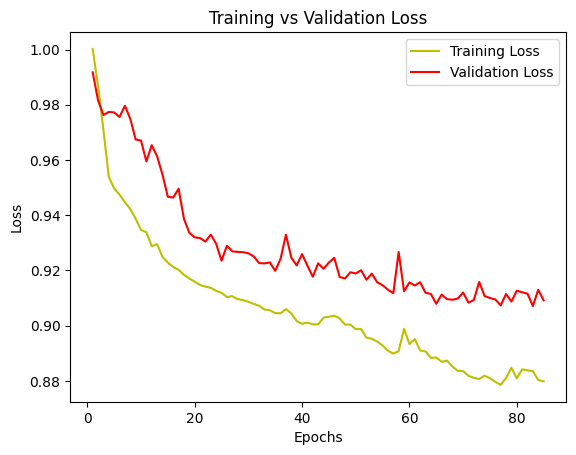

<Figure size 640x480 with 0 Axes>

In [108]:
loss = history_a.history['loss']
val_loss = history_a.history['val_loss']

epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'y', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.savefig('trainValLoss.png')

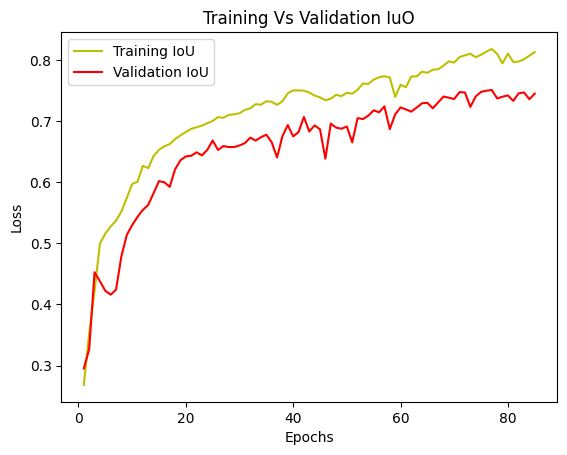

<Figure size 640x480 with 0 Axes>

In [105]:
jaccard_coef = history_a.history['jaccard_coef']
val_jaccard_coef = history_a.history['val_jaccard_coef']

epochs = range(1, len(jaccard_coef)+1)
plt.plot(epochs, jaccard_coef, 'y', label='Training IoU')
plt.plot(epochs, val_jaccard_coef, 'r', label='Validation IoU')
plt.title('Training Vs Validation IuO')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.savefig('trainValIuO.png')

In [106]:
ls

drive/                         sample_data/     trainValLoss.png
imagesattelitesegmentation.h5  trainValIuO.png  wandb/
